In [1]:
import sklearn
from PIL import Image
import skimage.io as SKimg
import numpy as np
import matplotlib.pyplot as plt
from scipy.sparse import csr_matrix
import scipy.io as sio
import pandas as pd

import sys
import ALLNeighborhoodrelationship as ABL

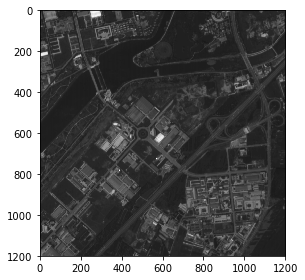

(1200, 1200)

In [2]:
Tpan =SKimg.imread("F:/pythontestdata/MyTiff/tianhui1200pan.tif")
SKimg.imshow(Tpan)
SKimg.show()
Tpan.shape

[[6 6 4 ..., 6 6 6]
 [6 6 6 ..., 6 6 6]
 [6 6 6 ..., 6 6 6]
 ..., 
 [3 3 3 ..., 2 2 2]
 [6 3 3 ..., 2 2 2]
 [6 3 3 ..., 2 2 2]]


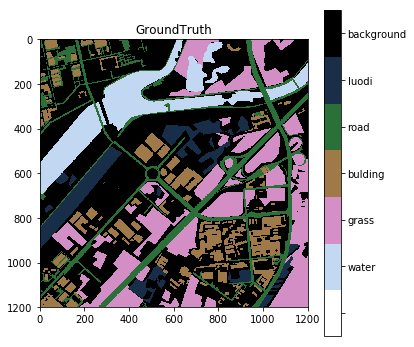

In [3]:
#matlab文件名  groudTrue
matfn='gt_tianhui1200.mat';
data=sio.loadmat(matfn);
mk = data['gt']
print(mk)

moban=mk*0.0;

plt.figure(figsize=(6,6))
im = Image.fromarray(mk);
plt.imshow(im,cmap=plt.cm.get_cmap('cubehelix_r',7));
cbar=plt.colorbar()
cbar.set_ticks(np.linspace(0,7,8))
cbar.set_ticklabels(('  ','water','grass','bulding','road','luodi','background'))
plt.clim(-0.5,6.5)
plt.title('GroundTruth');
plt.show();


In [4]:
Rows=Tpan.shape[0];  cols=Tpan.shape[1]; 
EarthGround=ABL.ThreePixcel();
NewMK=mk.reshape(1,mk.shape[0]*mk.shape[1]);

ALLUvalue=np.unique(EarthGround,return_index=True,return_inverse=True,return_counts = True)[0];
ALLUinverse=np.unique(EarthGround,return_index=True,return_inverse=True,return_counts = True)[2];

LenthofALLunique=len(ALLUvalue);

In [5]:
ALLfinalF=[];
for i in range(1,7):
    TF=(NewMK==i);
    TempMask=TF*EarthGround;
    usefulValue=TempMask[TF];

    Uvalue=np.unique(usefulValue,return_index=True,return_inverse=True,return_counts = True)[0];
    Uinverse=np.unique(usefulValue,return_index=True,return_inverse=True,return_counts = True)[2];
    Ufrence=(np.unique(usefulValue,return_index=True,return_inverse=True,return_counts = True)[3])/len(usefulValue);

    fram1=pd.DataFrame({'id':ALLUvalue});
    fram2=pd.DataFrame({'id':Uvalue,'F':Ufrence});
   
    MEge=pd.merge(fram1,fram2,on='id',how='outer');
    
    MegeFILL=MEge.fillna({'F':0.0});
    
    finalF=MegeFILL['F'];
    
    ALLfinalF.append(finalF);

In [6]:
LastLabel=np.zeros(LenthofALLunique);

for j in range(0,LenthofALLunique):
    MAXP=0;   maxindex=0;
    tempF=[ALLfinalF[0][j],ALLfinalF[1][j],ALLfinalF[2][j],ALLfinalF[3][j],ALLfinalF[4][j],ALLfinalF[5][j]];
    for k in range(0,len(tempF)):
        if(tempF[k]>MAXP):
            MAXP=tempF[k]
            maxindex=k+1;
    LastLabel[j]=maxindex;

NewLastLabe=LastLabel[ALLUinverse];
import math
finaLabel=mk-2;
for HL in range(0,len(NewLastLabe)):
    h=math.floor(HL/1200); l=HL%1200;
    finaLabel[h][l]=NewLastLabe[HL];

[[6 6 5 ..., 6 6 6]
 [2 6 6 ..., 6 6 6]
 [2 6 6 ..., 6 6 6]
 ..., 
 [3 3 3 ..., 1 1 1]
 [6 3 3 ..., 1 1 1]
 [4 3 3 ..., 1 1 1]]


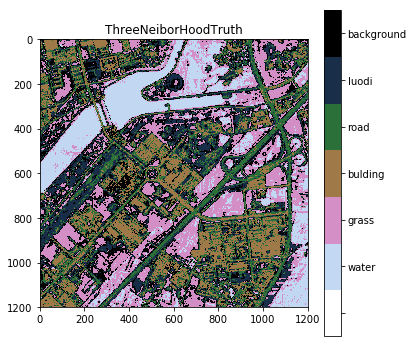

In [7]:
# 成图展示
mylabel=finaLabel;
print(mylabel)
plt.figure(figsize=(6,6))
im2 = Image.fromarray(mylabel);
plt.imshow(im2,cmap=plt.cm.get_cmap('cubehelix_r',7));
cbar=plt.colorbar()
cbar.set_ticks(np.linspace(0,7,8))
cbar.set_ticklabels(('  ','water','grass','bulding','road','luodi','background'))
plt.clim(-0.5,6.5)
plt.title('ThreeNeiborHoodTruth');
plt.show();

In [8]:
TrueOrFalse=(mylabel==mk)
TrueValue=TrueOrFalse[TrueOrFalse>0]
FalseValue=TrueOrFalse[TrueOrFalse==0]
correct=len(TrueValue)/(len(TrueValue)+len(FalseValue));
print(len(TrueValue));  print(len(FalseValue));  print(correct);

700050
739950
0.48614583333333333


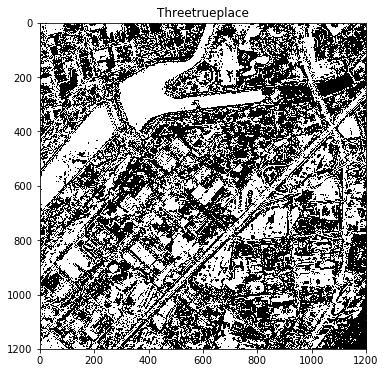

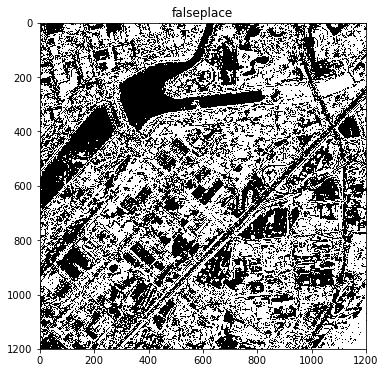

In [9]:
TRUEplace=(mylabel==mk)*10000;
FalsePlace=(mylabel!=mk)*10000;

plt.figure(figsize=(6,6))
imT = Image.fromarray(TRUEplace);
plt.imshow(imT,cmap='Oranges');
plt.title('Threetrueplace');
plt.show();

plt.figure(figsize=(6,6))
imF = Image.fromarray(FalsePlace);
plt.imshow(imF,cmap='Reds');
plt.title('falseplace');
plt.show();